#  For Box-plot of nuroanatomic structures 

In [25]:
# Date of saving the final script: 10-04-2024
# Data File name:'09042024_first_visit_NACC_new_normalization_subjectID_anaimous.xlsx
# Created by: NIBR   ##(NY)
# created for:TP revision Manuscript tracking # 2023TP001189R

In [26]:
import pandas as pd 
import numpy as np
import os
import seaborn  as sns
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import openpyxl
from PIL import Image
import io


from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from patsy.contrasts import Treatment

import researchpy as rp
import scipy.stats as stats
from statannot import add_stat_annotation
import statsmodels.api as sm

from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

C:\Users\Neha Yadav\AppData\Local\Temp\ipykernel_22024\2976345737.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [27]:
os.chdir(r'D:/Translation psychiatry/Revision_10-2-2024/Manuscript_revision_resubmission_09042024/Codes_and_files')
os.getcwd()

'D:\\Translation psychiatry\\Revision_10-2-2024\\Manuscript_revision_resubmission_09042024\\Codes_and_files'

In [28]:
df=pd.read_excel('09042024_first_visit_NACC_new_normalization_subjectID_anaimous.xlsx')
df

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized GRAYVOL,Normalized WHITEVOL,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,542.478964,508.540791,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1
1,2,64,1440.846,1152.588,286.419,648.068,504.520,1.8389,6.4687,13.5215,...,641.494636,499.402645,1.820248,6.403088,13.384351,CN,4.52340,2.45655,50-64,0
2,3,76,1323.530,1009.560,313.970,602.200,407.360,0.0000,5.8200,32.2800,...,620.219995,419.549680,0.000000,5.994155,33.245934,CN,3.48500,1.75500,65-79,0
3,4,80,1444.848,1077.309,355.580,595.537,481.772,11.9589,7.0667,26.4756,...,559.714122,452.792341,11.239546,6.641622,24.883034,CI,3.47480,1.83490,>=80,1
4,5,79,1385.370,982.130,400.810,585.710,396.420,2.4300,5.9400,48.1100,...,576.309345,390.057453,2.390998,5.844663,47.337834,CN,3.06500,1.60000,65-79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,1863,73,1422.220,1038.060,359.830,645.150,392.910,24.3300,7.2900,45.0900,...,635.060572,386.765325,23.949506,7.175993,44.384843,CI_AD,4.10000,2.15500,65-79,2
1863,1864,70,1249.960,953.880,294.830,556.760,397.120,1.2500,6.1800,14.0600,...,607.170570,433.076329,1.363178,6.739554,15.333031,CN,4.02500,2.38500,65-79,0
1864,1865,68,1279.144,1029.621,247.755,607.516,422.105,1.7676,6.0000,27.0498,...,647.406543,449.821139,1.883664,6.393970,28.825936,CN,4.66795,2.61680,65-79,0
1865,1866,69,1499.863,1047.882,447.690,615.787,432.095,4.2905,6.1520,63.8191,...,574.778024,403.319184,4.004770,5.742301,59.569001,CI_AD,3.12955,1.62795,65-79,2


In [29]:
Columns_names=df.columns.values.tolist()
print("COLUMNS Name :-", Columns_names)

COLUMNS Name :- ['SubjectID_A', 'NACCMRIA', 'NACCICV', 'NACCBRNV', 'CSFVOL', 'GRAYVOL', 'WHITEVOL', 'WMHVOL', 'HIPPOVOL', 'LATVENT', 'LENT', 'LENTM', 'LPARHIP', 'LPARHIPM', 'RENTM', 'RPARHIPM', 'SEX', 'NACCALZD', 'NACCAPOE', 'Normalized NACCBRNV', 'Normalized CSFVOL', 'Normalized GRAYVOL', 'Normalized WHITEVOL', 'Normalized WMHVOL', 'Normalized HIPPOVOL', 'Normalized LATVENT', 'Cognition', 'ENTM', 'PARHIPM', 'AgeGroup', 'Cn0Ci1Ad2']


In [30]:
df.loc[df['NACCALZD']==8, 'Cognitive_Status']="CN"
df.loc[df['NACCALZD']==0, 'Cognitive_Status']="CI"
df.loc[df['NACCALZD']==1, 'Cognition_Status']="CI_AD"
df

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2,Cognitive_Status,Cognition_Status
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1,CI,NaN
1,2,64,1440.846,1152.588,286.419,648.068,504.520,1.8389,6.4687,13.5215,...,1.820248,6.403088,13.384351,CN,4.52340,2.45655,50-64,0,CN,NaN
2,3,76,1323.530,1009.560,313.970,602.200,407.360,0.0000,5.8200,32.2800,...,0.000000,5.994155,33.245934,CN,3.48500,1.75500,65-79,0,CN,NaN
3,4,80,1444.848,1077.309,355.580,595.537,481.772,11.9589,7.0667,26.4756,...,11.239546,6.641622,24.883034,CI,3.47480,1.83490,>=80,1,CI,NaN
4,5,79,1385.370,982.130,400.810,585.710,396.420,2.4300,5.9400,48.1100,...,2.390998,5.844663,47.337834,CN,3.06500,1.60000,65-79,0,CN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,1863,73,1422.220,1038.060,359.830,645.150,392.910,24.3300,7.2900,45.0900,...,23.949506,7.175993,44.384843,CI_AD,4.10000,2.15500,65-79,2,NaN,CI_AD
1863,1864,70,1249.960,953.880,294.830,556.760,397.120,1.2500,6.1800,14.0600,...,1.363178,6.739554,15.333031,CN,4.02500,2.38500,65-79,0,CN,NaN
1864,1865,68,1279.144,1029.621,247.755,607.516,422.105,1.7676,6.0000,27.0498,...,1.883664,6.393970,28.825936,CN,4.66795,2.61680,65-79,0,CN,NaN
1865,1866,69,1499.863,1047.882,447.690,615.787,432.095,4.2905,6.1520,63.8191,...,4.004770,5.742301,59.569001,CI_AD,3.12955,1.62795,65-79,2,NaN,CI_AD


In [31]:
df_0= df[df['NACCALZD']==0]
df_1=df[df['NACCALZD']==1]
df_8=df[df['NACCALZD']==8]
df_0

,SubjectID_A,NACCMRIA,NACCICV,NACCBRNV,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,HIPPOVOL,LATVENT,...,Normalized WMHVOL,Normalized HIPPOVOL,Normalized LATVENT,Cognition,ENTM,PARHIPM,AgeGroup,Cn0Ci1Ad2,Cognitive_Status,Cognition_Status
0,1,77,1317.832,1000.009,296.153,516.150,483.859,21.6695,5.2743,25.4175,...,22.774868,5.543344,26.714054,CI,2.10710,1.34875,65-79,1,CI,NaN
3,4,80,1444.848,1077.309,355.580,595.537,481.772,11.9589,7.0667,26.4756,...,11.239546,6.641622,24.883034,CI,3.47480,1.83490,>=80,1,CI,NaN
7,8,67,1304.078,920.781,361.594,517.685,403.096,21.7030,5.7300,41.0710,...,23.050652,6.085806,43.621312,CI,3.26460,1.77515,65-79,1,CI,NaN
10,11,93,1322.042,890.376,384.108,520.330,370.046,47.5575,5.7736,43.6436,...,48.848748,5.930361,44.828581,CI,2.39120,1.57180,>=80,1,CI,NaN
15,16,84,1120.158,784.792,306.594,492.071,292.721,28.7720,5.3200,30.3540,...,34.879516,6.449292,36.797331,CI,3.83265,1.87680,>=80,1,CI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,1798,56,1595.464,1270.256,325.121,737.473,532.783,0.0870,7.6380,16.1290,...,0.075162,6.598704,13.934342,CI,4.06265,2.16980,50-64,1,CI,NaN
1814,1815,70,1061.980,839.700,221.390,471.310,368.390,0.8900,5.1400,18.6600,...,1.160755,6.703688,24.336735,CI,3.91500,1.92500,65-79,1,CI,NaN
1849,1850,68,1251.540,971.722,264.347,578.468,393.254,15.4711,6.0454,29.4488,...,17.121566,6.690327,32.590415,CI,3.63010,1.72150,65-79,1,CI,NaN
1854,1855,69,1723.724,1192.320,521.124,666.816,525.504,10.2797,5.3301,104.8820,...,8.259994,4.282868,84.275289,CI,0.87160,0.96585,65-79,1,CI,NaN


In [32]:
df_0['SEX'].value_counts()

SEX
2    104
1     93
Name: count, dtype: int64

In [33]:
df_0["AgeGroup"].value_counts()

AgeGroup
65-79    107
>=80      61
50-64     29
Name: count, dtype: int64

In [34]:
df_1["AgeGroup"].value_counts()

AgeGroup
65-79    314
>=80     216
50-64     58
Name: count, dtype: int64

In [35]:
df_1["SEX"].value_counts()

SEX
1    312
2    276
Name: count, dtype: int64

In [36]:
df_8["AgeGroup"].value_counts()

AgeGroup
65-79    560
50-64    300
>=80     222
Name: count, dtype: int64

In [37]:
df_8["SEX"].value_counts()

SEX
2    715
1    367
Name: count, dtype: int64

# For Boxplot of data 

In [38]:
# fig, ax = plt.subplots()

NameError: name 'df_Uq' is not defined

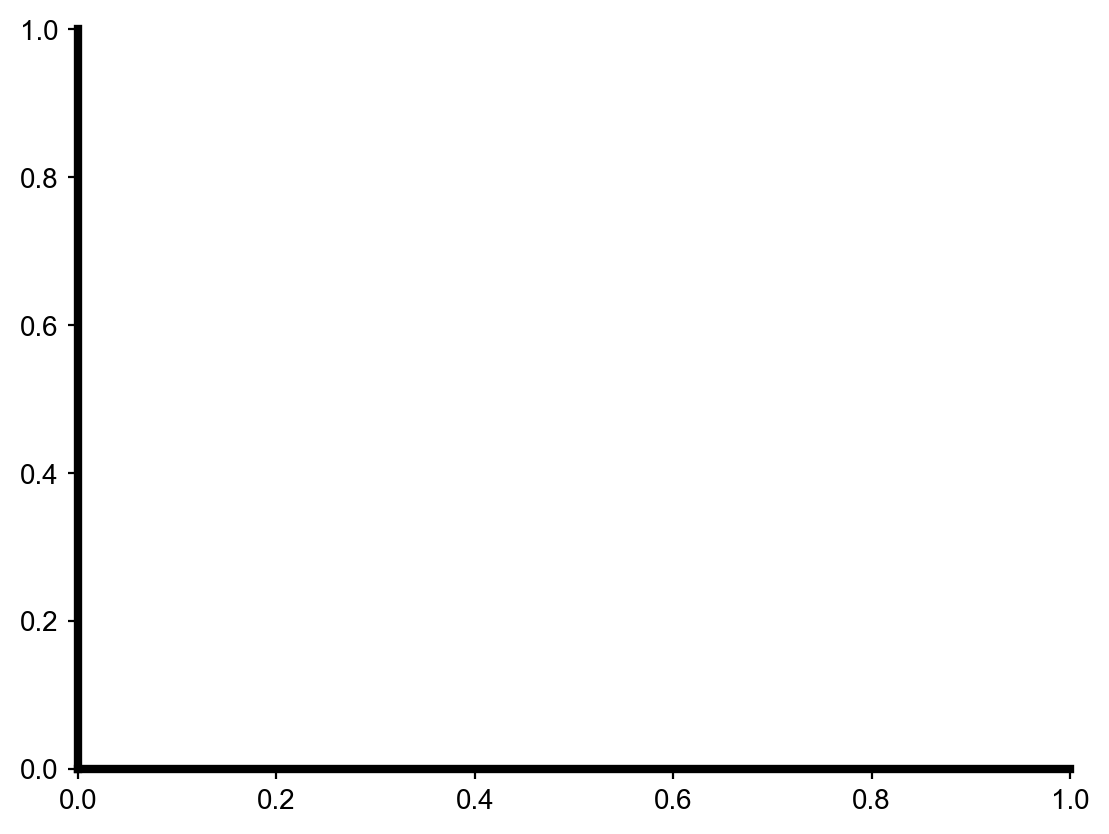

In [39]:
# For Gray Matter Boxplot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized GRAYVOL',  hue = 'Cognition',
                   size = 1.2, data = df_Uq,hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized GRAYVOL',
                hue = 'Cognition' , data = df_Uq,hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 )
    
#plt.yticks(np.arange(300,801,50))
    
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
plt.rcParams["font.family"] = "Arial"
rc('axes', linewidth=3)
rc('font', weight="normal")
    
plt.ylim(450,750)
# ax.set_xticks(np.arange(, 101, 10))
ax.set_yticks(np.arange(450, 751, 50))


### for saving the image
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
# #path where we want to save the image    
# path = r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'

# # add .png at the end of the file name to save as png    
    
# i = "normalise_GM"+"_CS.png"   
# path = os.path.join(path,i)
    
## Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(250.0, 600.0)

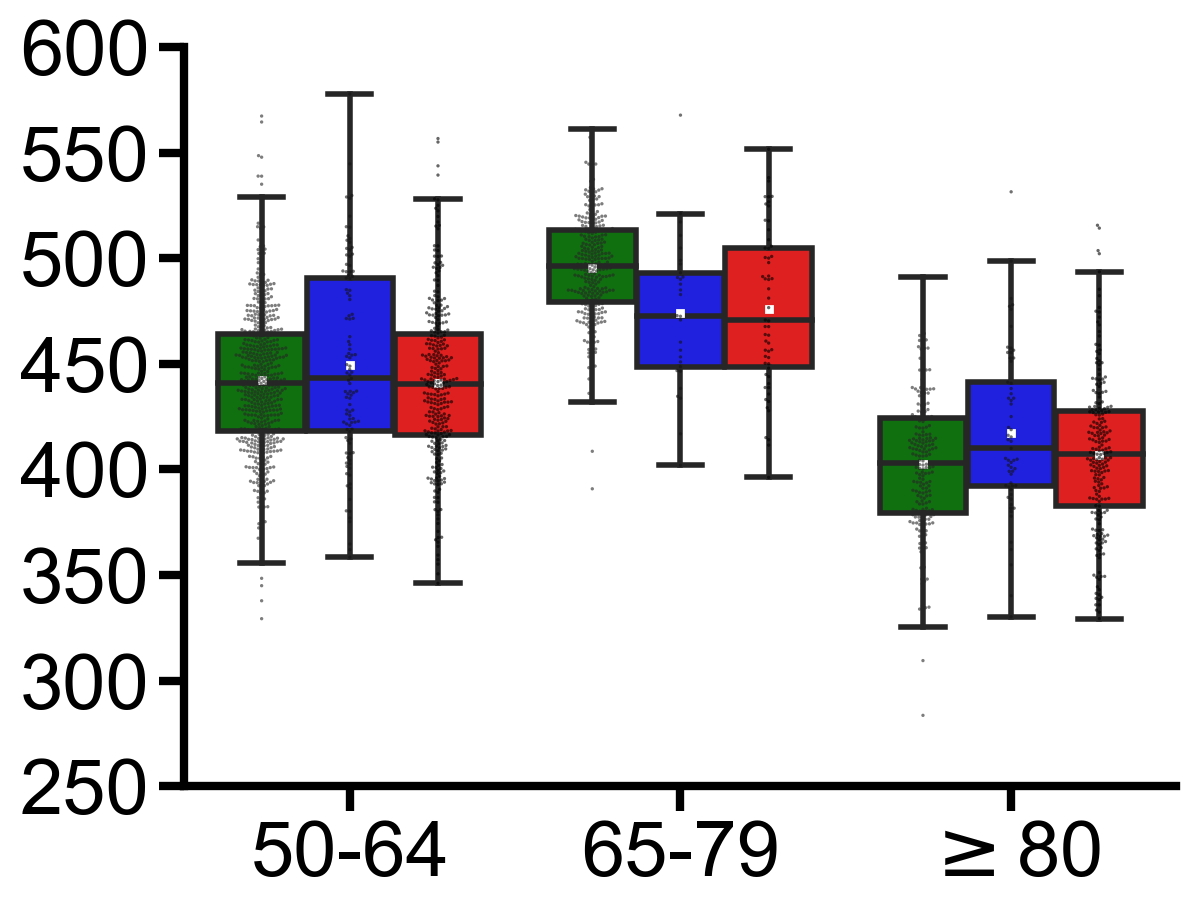

In [40]:
# For white Matter Box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized WHITEVOL',  hue = 'Cognition',
                   size = 1.2, data = df,hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized WHITEVOL',
                hue = 'Cognition' , data = df,hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 )
    
plt.yticks(np.arange(250,601,50))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(250,600)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path = r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i ="normalise_WM"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(200.0, 550.0)

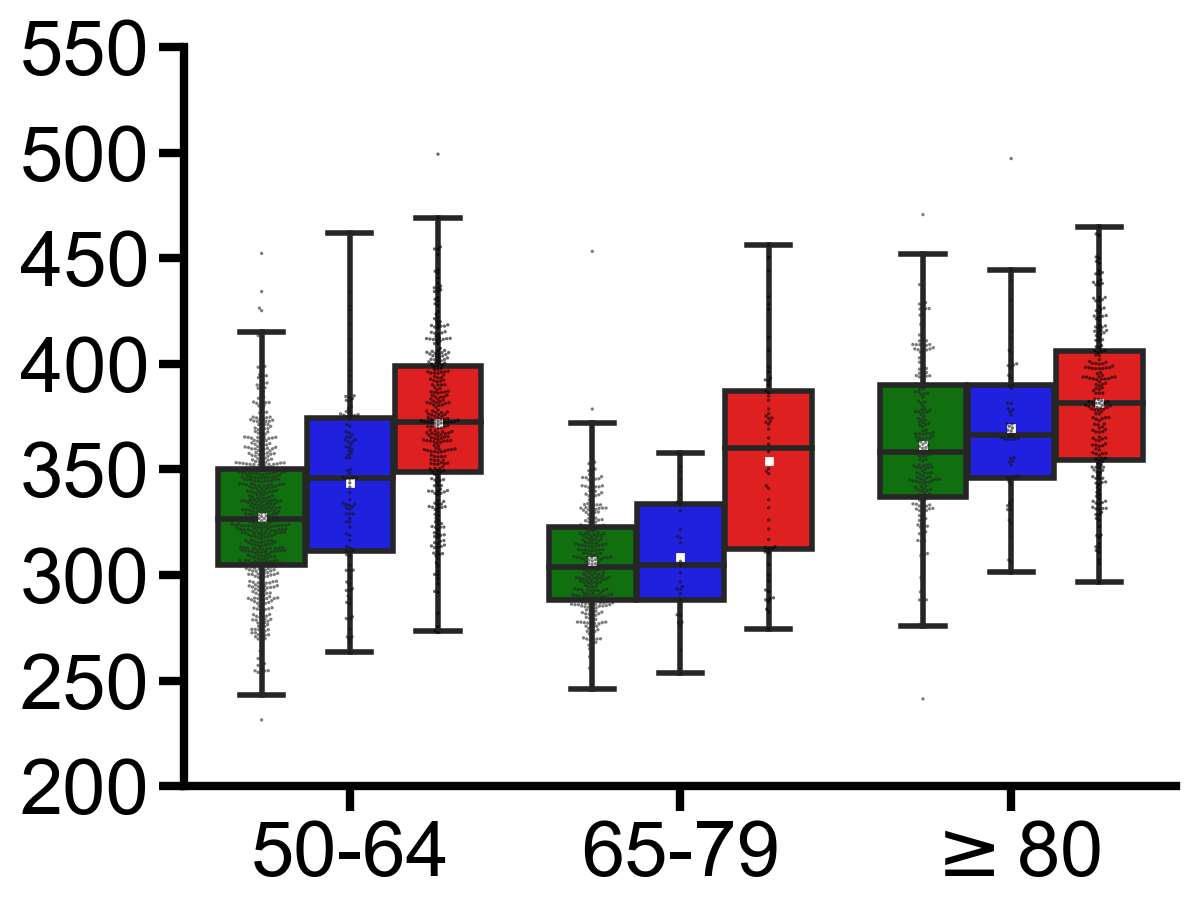

In [41]:
# For CSF box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized CSFVOL',  hue = 'Cognition',
                   size = 1.2, data = df, hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized CSFVOL',
                hue = 'Cognition' , data = df, hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 )
    
plt.yticks(np.arange(200,551,50))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(200,550)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path =  r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i="normalise_CSF"+"_CS_20-2-2024.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(0.0, 120.0)

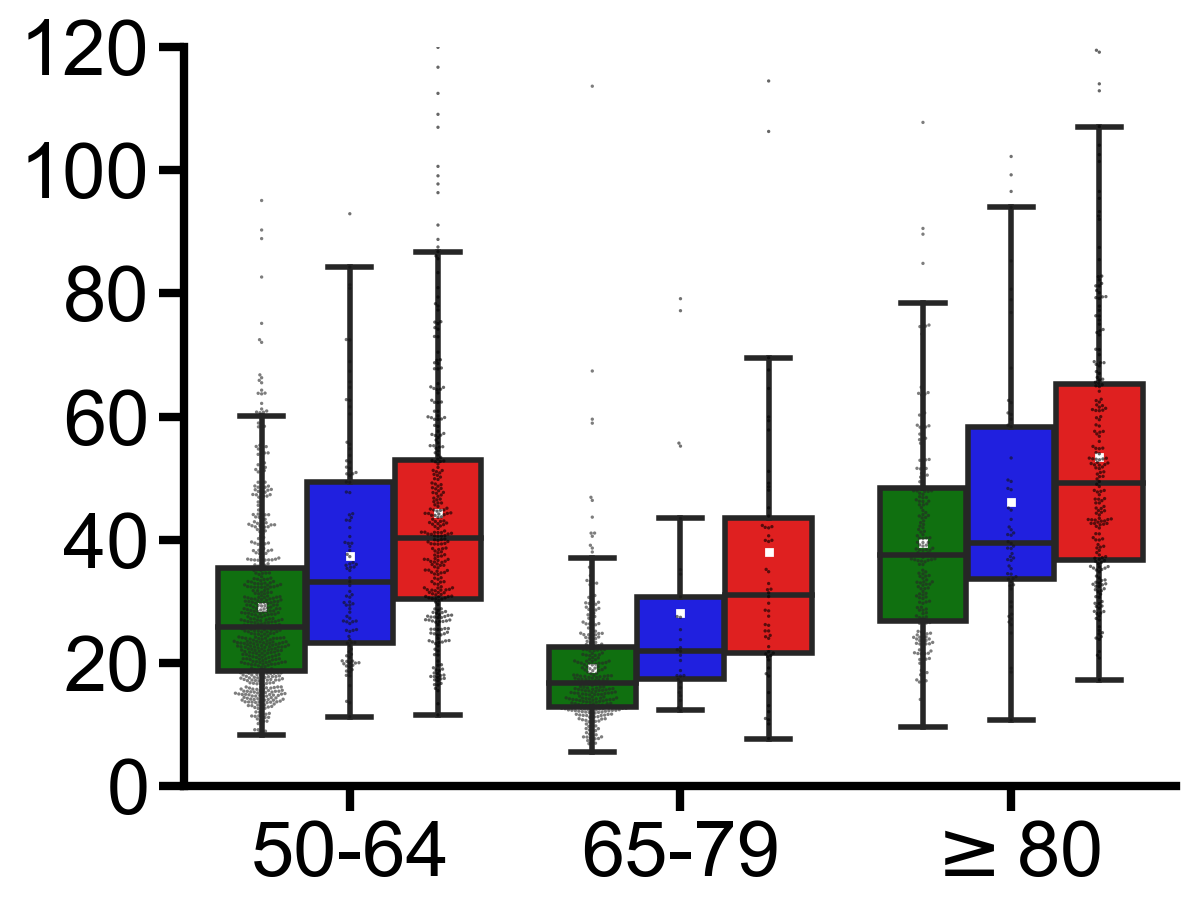

In [42]:
# For lateral ventrical Box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' ,   y = 'Normalized LATVENT',  hue = 'Cognition',
                   size = 1.2, data = df, hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized LATVENT',
                hue = 'Cognition' , data = df, hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 )
    
plt.yticks(np.arange(0,121,20))
    
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,120)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path = r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i="normalise_LV"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(0.0, 10.0)

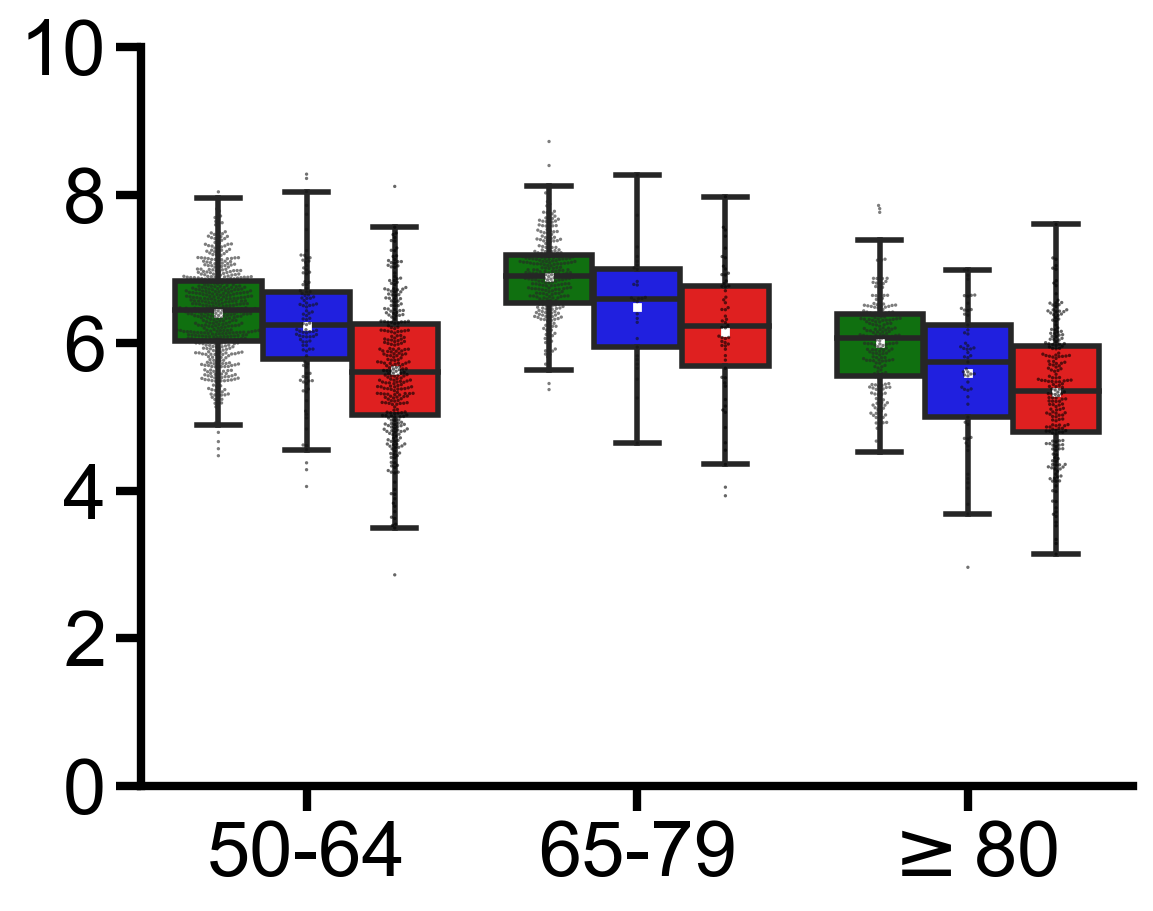

In [43]:
# For Hippocampus Box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized HIPPOVOL',  hue = 'Cognition',
                   size = 1.2, data = df, hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized HIPPOVOL',
                hue = 'Cognition' , data = df, hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 )
    
plt.yticks(np.arange(0,11,2))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,10)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path = r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i = "normalise_HIP"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(0.0, 7.0)

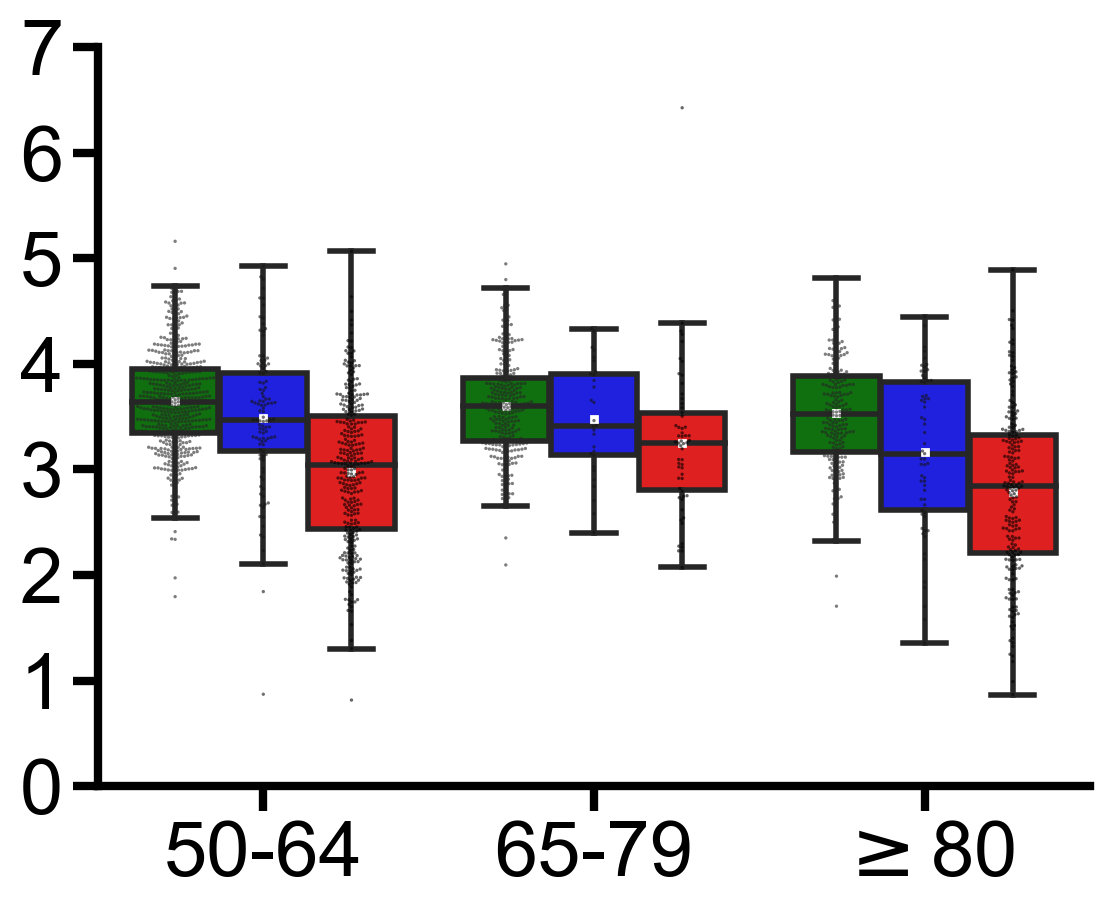

In [45]:
# For Entorhinal Cortex thickness Box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'ENTM',  hue = 'Cognition',
                   size = 1.2, data = df,hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'ENTM',
                hue = 'Cognition' , data = df,hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 , fontdict={'fontname':'Arial'})
    
plt.yticks(np.arange(0,8,1))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,7)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path = r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i = "normalise_ENT"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(0.0, 4.0)

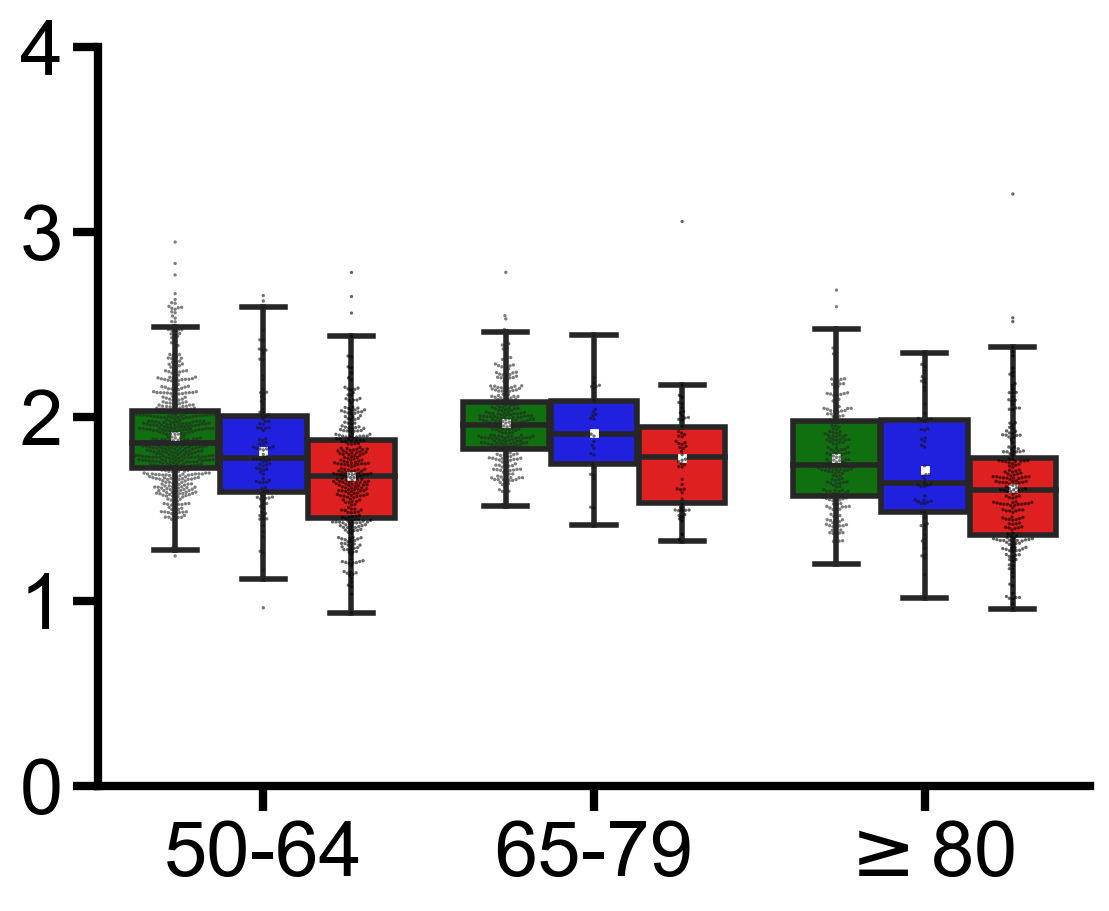

In [46]:
# For Parahippocampal gyrus Thickness boxplot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = "PARHIPM",  hue = 'Cognition',
                   size = 1.2, data = df, hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = "PARHIPM",
                hue = 'Cognition' , data = df, hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 , fontdict={'fontname':'Arial'})
    
plt.yticks(np.arange(0,8,1))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(0,4)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path =  r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i = "normalise_PHIP"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


(800.0, 2000.0)

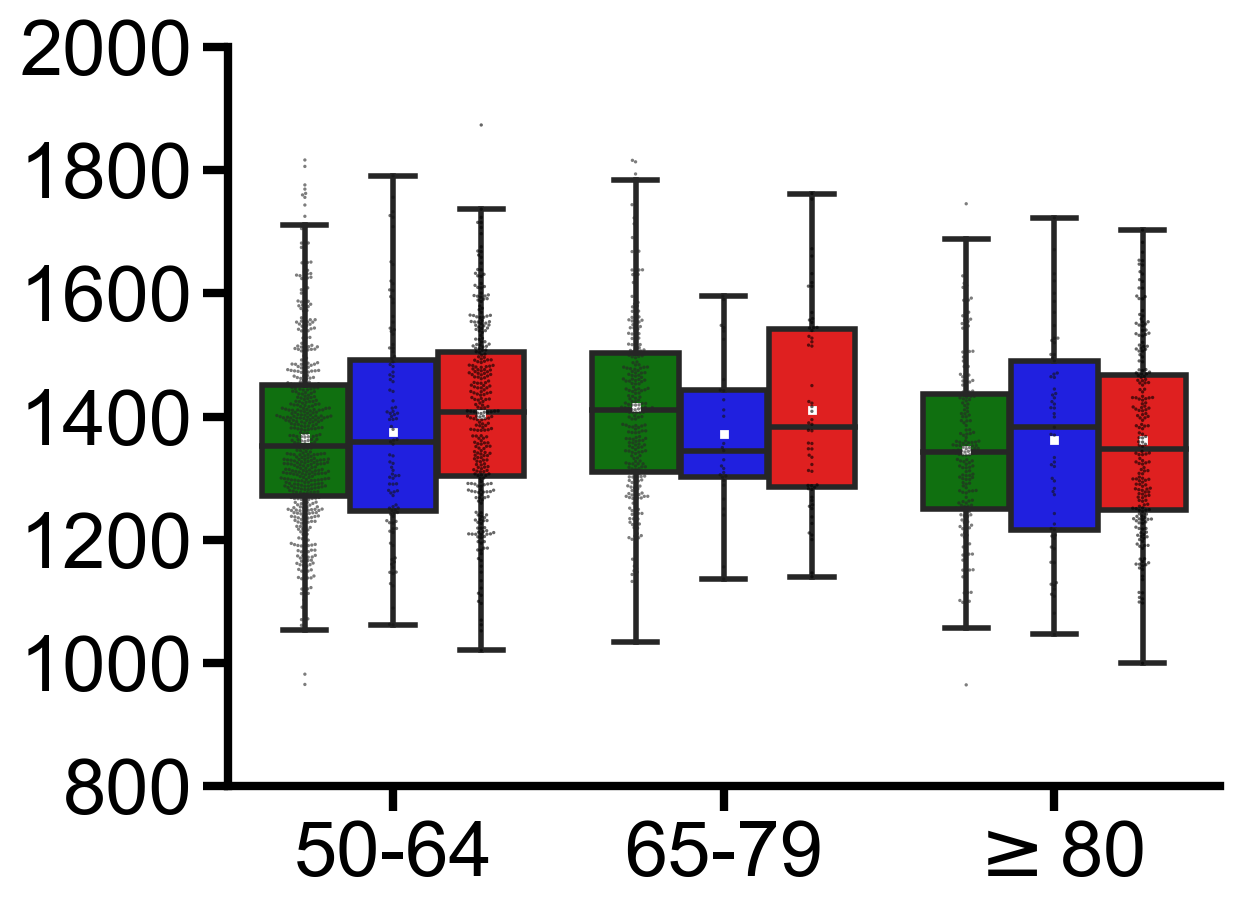

In [47]:
# For Intra Cranial Volume box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'NACCICV',  hue = 'Cognition',
                   size = 1.2, data = df, hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'NACCICV',
                hue = 'Cognition' , data = df, hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 , fontdict={'fontname':'Arial'})
    
plt.yticks(np.arange(800,2001,200))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
plt.ylim(800,2000)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path = r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i = "normalise_ICV"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

C:\Users\Neha Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:Black'` for same effect.
  warnings.warn(msg, FutureWarning)


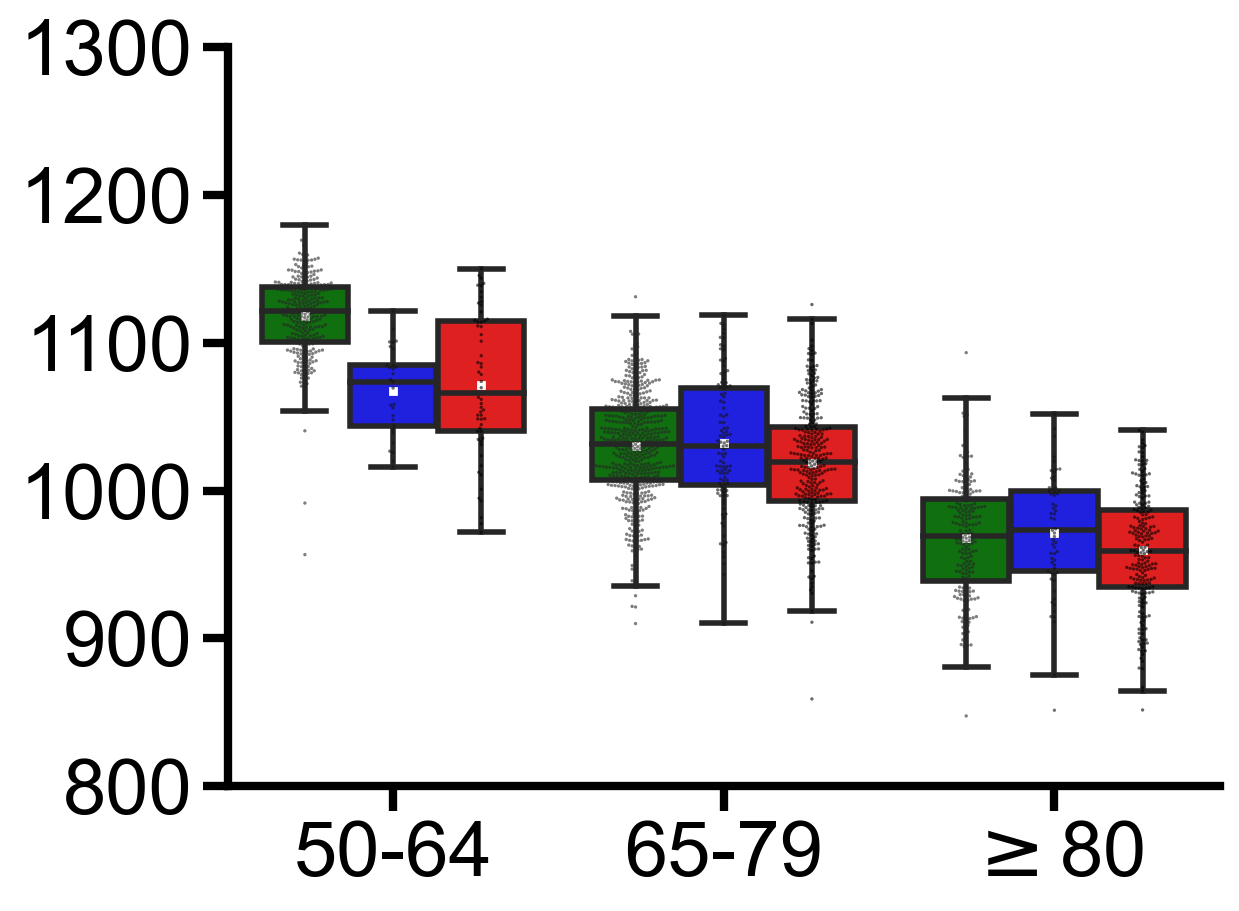

In [25]:
# For Normalised Total Brain Volume box plot

fig, ax = plt.subplots()
       
right_side = ax.spines["right"]
right_side.set_visible(False)
    # Hide the Right border of the plot
top_side = ax.spines["top"]
top_side.set_visible(False)
    # Hide the top border of the plot
    
    
sns.swarmplot(x = 'AgeGroup' , y = 'Normalized NACCBRNV',  hue = 'Cognition',
                   size = 1.2, data = df, hue_order=["CN","CI","CI_AD"],
                  dodge = True,
                  alpha = 0.6,
                  color = 'Black')
    
sns.boxplot(x = 'AgeGroup' , y = 'Normalized NACCBRNV',
                hue = 'Cognition' , data = df, hue_order=["CN","CI","CI_AD"],
                dodge = True , showmeans=True ,
               palette=dict(CN="g", CI="b", CI_AD="r"), 
                meanprops={"marker":"s", "markersize": 2 , "markerfacecolor" : "white" , "markeredgecolor":"white"},showfliers = False, linewidth=2 ) 
    
    
plt.xlabel('' , fontdict ={'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
plt.ylabel(   '', fontdict = {'fontname': 'Arial', 'fontsize': 16,'fontweight':'bold'})
    
    
    #  plt.yticks(np.arange( df[i].min() - 5 ,    ) , fontsize=16 )
    
plt.xticks([0,1,2], [ '50-64', '65-79', r'$\geq$80'], fontsize=28 , fontdict={'fontname':'Arial'})
    
plt.yticks(np.arange(800,1301,100))
    
ax = plt.gca()
plt.rcParams["font.family"] = "Arial"
ax.tick_params(axis='both', which='major', labelsize=28 )
plt.legend([],[], frameon = False)

ax.xaxis.set_tick_params(width=3, length=9)
ax.yaxis.set_tick_params(width=3, length=9)
rc('axes', linewidth=3)
rc('font', weight='normal')
    
# plt.ylim(800,1300)
   
# png1 = io.BytesIO()
    
# plt.savefig(png1, dpi=600 , facecolor='w', edgecolor='w', format= 'png', bbox_inches = 'tight')
# png2 = Image.open(png1)
    
    
# path =  r'D:/Translation psychiatry/Revision_10-2-2024/Box_plot'
# #path where we want to save the image 
    
    
# i = "normalise_BNRV"+"_CS_20-2-24.png"
#     # add .png at the end of the file name to save as png
    
# path = os.path.join(path,i)
    
#     # Save as TIFF 
# png2.save(path)
# png1.close()

# For Welch's t-test  

In [48]:
## NACCALZD : {8=CN, 0=CI, 1=CI_AD}

In [50]:
#%% T-values of the t-tests in one csv file  volumes

trial_csv = open(r"Ttest_t-value.csv",'w')
# Write Only (‘w’): Open the file for writing. For existing file, the data is truncated and over-written.
# The handle is positioned at the beginning of the file. Creates the file if the file does not exist.

features = ["Normalized GRAYVOL","Normalized WHITEVOL","Normalized HIPPOVOL","Normalized CSFVOL",
            "Normalized LATVENT","LENTM", "RENTM",'ENTM', "LPARHIPM", "RPARHIPM",'PARHIPM',
            'Normalized NACCBRNV','NACCICV', "NACCMRIA", "Normalized WMHVOL"]


for j in features:
    data = []
    a1 = df.loc[ ((df["NACCMRIA"] > 49 ) &(df["NACCMRIA"] < 65) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
        
    if (len(a1)>0) & (len(a2)>0):
        s_1,p_1 = ttest_ind(a1.dropna(), a2.dropna(),equal_var=False)
    else:
        s_1 = "-"
    if (len(a2)>0) & (len(a3)>0):
        s_2,p_2 = ttest_ind(a3.dropna(), a2.dropna(),equal_var=False)
    else:
        s_2 = "-"
    if (len(a1)>0) & (len(a3)>0):
        s_3,p_3 = ttest_ind(a3.dropna(), a1.dropna(),equal_var=False)
    else:
        s_3 = "-"
    data.append ({'0vs1': s_1 , '1vs8' : s_2 ,'8vs0' : s_3})
    
    
    
    a1 =  df.loc[((df["NACCMRIA"] > 64 ) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2=  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 =  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"]  < 80) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
 
    if (len(a1)>0) & (len(a2)>0):
        s_4,p_4 = ttest_ind(a1.dropna(), a2.dropna(),equal_var=False)
    else:
        s_4 = "-"
        
    if (len(a2)>0) & (len(a3)>0):
        s_5,p_5 = ttest_ind(a3.dropna(), a2.dropna(),equal_var=False)
    else:
        s_5 = "-"
        
        
    if (len(a1)>0) & (len(a3)>0):
        s_6,p_6 = ttest_ind(a3.dropna(), a1.dropna(),equal_var=False)
    else:
        s_6 = "-"
    data.append ({'0vs1': s_4 , '1vs8' : s_5 ,'8vs0' : s_6})
    
    
    a1 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 8)][str(j)].dropna()

    if (len(a1)>0) & (len(a2)>0):
        s_7,p_7 = ttest_ind(a1.dropna(), a2.dropna(),equal_var=False)
    else:
        s_7 = "-"
    if (len(a3)>0) & (len(a2)>0):
        s_8,p_8 = ttest_ind(a3.dropna(), a2.dropna(),equal_var=False)
    else:
        s_8 = "-"
    if (len(a1)>0) & (len(a3)>0):
        s_9,p_9 = ttest_ind(a3.dropna(), a1.dropna(),equal_var=False)
    else:
        s_9 = "-"
    data.append ({'0vs1': s_7 , '8vs1' : s_8 ,'8vs0' : s_9})
    
    
    trial_csv.write(  j + ',' + '0vs1' + ','  + '8vs1' + ',' + '8vs0' + '\n')
    
    trial_csv.write('50-64'  +  ',' + str(s_1) + ',' +  str(s_2) +  ',' + str(s_3)  +  '\n' )
    
    trial_csv.write('65-79'  +  ',' + str(s_4) + ',' +  str(s_5) +  ',' +  str(s_6) +  '\n' )
    
    trial_csv.write('>=80'    +  ',' + str(s_7) + ',' + str(s_8)  +  ',' + str(s_9)  +  '\n' )

    
trial_csv.close()


29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222
29
58
300
107
314
560
61
216
222


In [52]:
# For p values of t-tests for neuroanatomic structures in one csv file

trial_csv = open(r"Ttest_p-value_neuronamatomic_structures.csv",'w')
# Write Only (‘w’): Open the file for writing. For existing file, the data is truncated and over-written.
# The handle is positioned at the beginning of the file. Creates the file if the file does not exist.

features = ["Normalized GRAYVOL","Normalized WHITEVOL","Normalized HIPPOVOL","Normalized CSFVOL",
            "Normalized LATVENT","LENTM", "RENTM",'ENTM', "LPARHIPM", "RPARHIPM",'PARHIPM',
            'Normalized NACCBRNV','NACCICV', "NACCMRIA", "Normalized WMHVOL"]


for j in features:
    

    data = []
    a1 = df.loc[((df["NACCMRIA"] > 49 ) &(df["NACCMRIA"] < 65) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    
    if (len(a1)>0) & (len(a2)>0):
        s_1,p_1 = ttest_ind(a1.dropna(), a2.dropna(),equal_var=False)
    else:
        p_1 = "-"
    if (len(a2)>0) & (len(a3)>0):
        s_2,p_2 = ttest_ind(a3.dropna(), a2.dropna(),equal_var=False)
    else:
        p_2 = "-"
    if (len(a1)>0) & (len(a3)>0):
        s_3,p_3 = ttest_ind(a3.dropna(), a1.dropna(),equal_var=False)
    else:
        p_3 = "-"
    data.append ({'0vs1': p_1 , '1vs8' : p_2 ,'8vs0' : p_3})
    
    
    a1 =  df.loc[((df["NACCMRIA"] > 64 ) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 =  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 =  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"]  < 80) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
 
    if (len(a1)>0) & (len(a2)>0):
        s_4,p_4 = ttest_ind(a1.dropna(), a2.dropna(),equal_var=False)
    else:
        p_4 = "-"
        
    if (len(a2)>0) & (len(a3)>0):
        s_5,p_5 = ttest_ind(a3.dropna(), a2.dropna(),equal_var=False)
    else:
        p_5 = "-"
        
        
    if (len(a1)>0) & (len(a3)>0):
        s_6,p_6 = ttest_ind(a3.dropna(), a1.dropna(),equal_var=False)
    else:
        p_6 = "-"
    data.append ({'0vs1': p_4 , '1vs8' : p_5 ,'8vs0' : p_6})
    
    
    a1 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 8)][str(j)].dropna()

    if (len(a1)>0) & (len(a2)>0):
        s_7,p_7 = ttest_ind(a1.dropna(), a2.dropna(),equal_var=False)
    else:
        p_7 = "-"
    if (len(a3)>0) & (len(a2)>0):
        s_8,p_8 = ttest_ind(a3.dropna(), a2.dropna(),equal_var=False)
    else:
        p_8 = "-"
    if (len(a1)>0) & (len(a3)>0):
        s_9,p_9 = ttest_ind(a3.dropna(), a1.dropna(),equal_var=False)
    else:
        p_9 = "-"
    data.append ({'0vs1': p_7 , '8vs1' : p_8 ,'8vs0' : p_9})
    
    
    trial_csv.write(  j + ',' + '0vs1' + ','  + '8vs1' + ',' + '8vs0' + '\n')
    
    trial_csv.write('50-64'  +  ',' + str(p_1) + ',' +  str(p_2) +  ',' + str(p_3)  +  '\n' )
    
    trial_csv.write('65-79'  +  ',' + str(p_4) + ',' +  str(p_5) +  ',' +  str(p_6) +  '\n' )
    
    trial_csv.write('>=80'    +  ',' + str(p_7) + ',' + str(p_8)  +  ',' + str(p_9)  +  '\n' )

    
trial_csv.close()


# Manwitney U test 


In [53]:
from scipy.stats import mannwhitneyu as mu

In [57]:
#%% mannwitney p values for WMH and other neuroanatomic structure csv file  

trial_csv = open(r"Mannwitney_p-value.csv",'w')
# Write Only (‘w’): Open the file for writing. For existing file, the data is truncated and over-written.
# The handle is positioned at the beginning of the file. Creates the file if the file does not exist.

features = ["Normalized WMHVOL","Normalized GRAYVOL","Normalized WHITEVOL","Normalized HIPPOVOL",
            "Normalized CSFVOL","Normalized LATVENT","LENTM", "RENTM",'ENTM', "LPARHIPM", "RPARHIPM",
            'PARHIPM','Normalized NACCBRNV','NACCICV', "NACCMRIA"]


for j in features:
    

    data = []
    a1 = df.loc[((df["NACCMRIA"] > 49 ) &(df["NACCMRIA"] < 65) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    
    if (len(a1)>0) & (len(a2)>0):
        s_1,p_1 = mu(a1.dropna(), a2.dropna())
    else:
        p_1 = "-"
    if (len(a2)>0) & (len(a3)>0):
        s_2,p_2 = mu(a3.dropna(), a2.dropna())
    else:
        p_2 = "-"
    if (len(a1)>0) & (len(a3)>0):
        s_3,p_3 = mu(a3.dropna(), a1.dropna())
    else:
        p_3 = "-"
    data.append ({'0vs1': p_1 , '1vs8' : p_2 ,'8vs0' : p_3})
    
    
    a1 =  df.loc[((df["NACCMRIA"] > 64 ) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2=  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 =  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"]  < 80) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    
 
    if (len(a1)>0) & (len(a2)>0):
        s_4,p_4 = mu(a1.dropna(), a2.dropna())
    else:
        p_4 = "-"
        
    if (len(a2)>0) & (len(a3)>0):
        s_5,p_5 = mu(a3.dropna(), a2.dropna())
    else:
        p_5 = "-"
        
        
    if (len(a1)>0) & (len(a3)>0):
        s_6,p_6 = mu(a3.dropna(), a1.dropna())
    else:
        p_6 = "-"
    data.append ({'0vs1': p_4 , '1vs8' : p_5 ,'8vs0' : p_6})
    
    
    a1 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 0)][str(j)].dropna()
    a2 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 1)][str(j)].dropna()
    a3 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 8)][str(j)].dropna()
   

    if (len(a1)>0) & (len(a2)>0):
        s_7,p_7 = mu(a1.dropna(), a2.dropna())
    else:
        p_7 = "-"
    if (len(a3)>0) & (len(a2)>0):
        s_8,p_8 = mu(a3.dropna(), a2.dropna())
    else:
        p_8 = "-"
    if (len(a1)>0) & (len(a3)>0):
        s_9,p_9 = mu(a3.dropna(), a1.dropna())
    else:
        p_9 = "-"
    data.append ({'0vs1': p_7 , '8vs1' : p_8 ,'8vs0' : p_9})
    
    
    trial_csv.write(  j + ',' + '0vs1' + ','  + '8vs1' + ',' + '8vs0' + '\n')
    
    trial_csv.write('50-64'  +  ',' + str(p_1) + ',' +  str(p_2) +  ',' + str(p_3)  +  '\n' )
    
    trial_csv.write('65-79'  +  ',' + str(p_4) + ',' +  str(p_5) +  ',' +  str(p_6) +  '\n' )
    
    trial_csv.write('>=80'    +  ',' + str(p_7) + ',' + str(p_8)  +  ',' + str(p_9)  +  '\n' )

    
trial_csv.close()

# Mean of neuroanatomic volumes and thickness and Age

In [55]:
#%% mean 
trial_csv = open(r"MEAN_Volume_Thick_Neuroanatomic_Strucures.csv",'w')
# Write Only (‘w’): Open the file for writing. For existing file, the data is truncated and over-written.
# The handle is positioned at the beginning of the file. Creates the file if the file does not exist.

features = ["Normalized GRAYVOL","Normalized WHITEVOL","Normalized HIPPOVOL","Normalized CSFVOL",
            "Normalized LATVENT","LENTM", "RENTM",'ENTM', "LPARHIPM", "RPARHIPM",'PARHIPM',
            'Normalized NACCBRNV','NACCICV', "NACCMRIA", "Normalized WMHVOL"]

for j in features:
    

    data = []
    a1 = df.loc[ ((df["NACCMRIA"] > 49 ) &(df["NACCMRIA"] < 65) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    a2 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a3 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    
    
    if (len(a1)>0) :
        p_1 = a1.mean()
    else:
        p_1 = "-"
    if (len(a2)>0) :
        p_2 = a2.mean()
    else:
        p_2 = "-"
    if  (len(a3)>0):
        p_3 = a3.mean()
    else:
        p_3 = "-"
    data.append ({'CN': p_1 , 'MCI' : p_2 ,'AD' : p_3})
    
    
    a1 =  df.loc[((df["NACCMRIA"] > 64 ) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    a2=  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a3 =  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"]  < 80) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    
 
    if (len(a1)>0) :
        p_4 = a1.mean()
    else:
        p_4 = "-"
        
    if (len(a2)>0) :
        p_5 = a2.mean()
    else:
        p_5 = "-"
        
        
    if (len(a3)>0):
        p_6 =  a3.mean()
    else:
        p_6 = "-"
    data.append ({'CN': p_4 , 'MCI' : p_5 ,'AD' : p_6})
    
    
    a1 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 8)][str(j)].dropna()
    a2 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 0)][str(j)].dropna()
    a3 =  df.loc[ (df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 1)][str(j)].dropna()
    

    if (len(a1)>0) :
        p_7 =  a1.mean()
    else:
        p_7 = "-"
    if (len(a2)>0) :
        p_8 =  a2.mean()
    else:
        p_8 = "-"
    if  (len(a3)>0):
        p_9 = a3.mean()
    else:
        p_9 = "-"
    data.append ({'CN': p_7 , 'MCI' : p_8 ,'AD' : p_9})
    
    
    trial_csv.write(  j + ',' + 'CN' + ','  + 'MCI' + ',' + 'AD' + '\n')
    
    trial_csv.write('50-64'  +  ',' + str(p_1) + ',' +  str(p_2) +  ',' + str(p_3)  +  '\n' )
    
    trial_csv.write('65-79'  +  ',' + str(p_4) + ',' +  str(p_5) +  ',' +  str(p_6) +  '\n' )
    
    trial_csv.write('>=80'    +  ',' + str(p_7) + ',' + str(p_8)  +  ',' + str(p_9)  +  '\n' )

    
trial_csv.close()

# for standard deviation of neuroanatomic volume and thickness and Age

In [56]:
# standard deviation
## NACCMRIA is the variable for Age 
trial_csv = open(r"Standard_deviation_volunme_Thickness.csv",'w')
# Write Only (‘w’): Open the file for writing. For existing file, the data is truncated and over-written.
# The handle is positioned at the beginning of the file. Creates the file if the file does not exist.

features = ["Normalized GRAYVOL","Normalized WHITEVOL","Normalized HIPPOVOL","Normalized CSFVOL",
            "Normalized LATVENT","LENTM", "RENTM",'ENTM', "LPARHIPM", "RPARHIPM",'PARHIPM',
            'Normalized NACCBRNV','NACCICV', "NACCMRIA", "Normalized WMHVOL"]

for j in features:

    data = []
    a1 = df.loc[ ((df["NACCMRIA"] > 49 ) &(df["NACCMRIA"] < 65) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    a2 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a3 = df.loc[((df["NACCMRIA"] > 49) &(df["NACCMRIA"]  < 65) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    
    
    if (len(a1)>0) :
        p_1 = a1.std()
    else:
        p_1 = "-"
    if (len(a2)>0) :
        p_2 = a2.std()
    else:
        p_2 = "-"
    if  (len(a3)>0):
        p_3 = a3.std()
    else:
        p_3 = "-"
    data.append ({'CN': p_1 , 'CI' : p_2 ,'CI_AD' : p_3})
    
    
    a1 =  df.loc[((df["NACCMRIA"] > 64 ) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 8)][str(j)].dropna()
    a2=  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"] < 80) ) & (df['NACCALZD'] == 0)][str(j)].dropna()
    a3 =  df.loc[((df["NACCMRIA"] > 64) & (df["NACCMRIA"]  < 80) ) & (df['NACCALZD'] == 1)][str(j)].dropna()
    
 
    if (len(a1)>0) :
        p_4 = a1.std()
    else:
        p_4 = "-"
        
    if (len(a2)>0) :
        p_5 = a2.std()
    else:
        p_5 = "-"
        
        
    if (len(a3)>0):
        p_6 =  a3.std()
    else:
        p_6 = "-"
    data.append ({'CN': p_4 , 'CI' : p_5 ,'CI_AD' : p_6})
    
    
    a1 =  df.loc[(df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 8)][str(j)].dropna()
    a2 =  df.loc[(df["NACCMRIA"] >=80)  & (df['NACCALZD'] == 0)][str(j)].dropna()
    a3 =  df.loc[ (df["NACCMRIA"] >= 80)  & (df['NACCALZD'] == 1)][str(j)].dropna()
    

    if (len(a1)>0) :
        p_7 =  a1.std()
    else:
        p_7 = "-"
    if (len(a2)>0) :
        p_8 =  a2.std()
    else:
        p_8 = "-"
    if  (len(a3)>0):
        p_9 = a3.std()
    else:
        p_9 = "-"
    data.append ({'CN': p_7 , 'CI' : p_8 ,'CI_AD' : p_9})

    
    trial_csv.write(  j + ',' + 'CN' + ','  + 'CI' + ',' + 'CI_AD' + '\n')
    
    trial_csv.write('50-64'  +  ',' + str(p_1) + ',' +  str(p_2) +  ',' + str(p_3)  +  '\n' )
    
    trial_csv.write('65-79'  +  ',' + str(p_4) + ',' +  str(p_5) +  ',' +  str(p_6) +  '\n' )
    
    trial_csv.write('>=80'    +  ',' + str(p_7) + ',' + str(p_8)  +  ',' + str(p_9)  +  '\n' )

    
trial_csv.close()